In [1]:
import pandas as pd
import numpy as np
#import datetime as dt
#import seaborn as sns ## optional
import matplotlib.pyplot as plt ## optional
import tsfresh
from tsfresh import extract_features

In [2]:
# Test and meaning
#4704 : 'HR', 4721 : 'CVP', 4722 : 'Some_1', 4723 : 'ArtBPD', 4726 : 'Some_2', 4727 : 'ArtBPS', 5433 : 'ArtBPM', 5966 : 'UR_h', 7129 : 'TEMP'

In [3]:
# Home Block

Full_DF = pd.read_csv("Full_DF_with_diff.csv")
Full_DF.head(20)

,Unnamed: 0,h-num_demo,Counter,4704,4721,4722,MAP,4726,4727,5433,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,0,002E7282,0,85.5,NaN,78.00001,50.50000,131.50000,137.00000,32.499995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,002E7282,1,90.5,NaN,78.00001,50.50000,137.00000,137.00000,32.499995,...,5.50000,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.399995,NaN
2,2,002E7282,2,90.0,NaN,78.00001,50.50000,137.00000,137.00000,32.499995,...,0.00000,-5.50000,0.00000,0.00000,0.000000,0.000000,-20.0,-20.0,0.600000,2.000050e-01
3,3,002E7282,3,90.0,NaN,78.00001,38.00000,137.00000,74.99999,51.000000,...,0.00000,0.00000,-62.00001,-62.00001,18.500005,18.500005,-40.0,-20.0,-0.400000,-1.000000e+00
4,4,002E7282,4,87.0,NaN,78.00001,46.99999,137.00000,109.00010,66.999980,...,0.00000,0.00000,34.00011,96.00012,15.999980,-2.500025,15.0,55.0,-0.500000,-1.000000e-01
5,5,002E7282,5,102.0,NaN,78.00001,54.00000,137.00000,150.00000,86.000020,...,0.00000,0.00000,40.99990,6.99979,19.000040,3.000060,45.0,30.0,0.500000,1.000000e+00
6,6,002E7282,6,109.0,NaN,78.00001,56.99999,137.00000,158.00000,91.000000,...,0.00000,0.00000,8.00000,-32.99990,4.999980,-14.000060,0.0,-45.0,0.900000,4.000000e-01
7,7,002E7282,7,106.0,NaN,78.00001,53.00000,137.00000,126.99990,77.000020,...,0.00000,0.00000,-31.00010,-39.00010,-13.999980,-18.999960,-20.0,-20.0,-0.400000,-1.300000e+00
8,8,002E7282,8,102.0,NaN,78.00001,56.99999,137.00000,146.99990,86.999990,...,0.00000,0.00000,20.00000,51.00010,9.999970,23.999950,-10.0,10.0,0.000000,4.000000e-01
9,9,002E7282,9,106.0,NaN,78.00001,54.99999,137.00000,153.00000,87.999980,...,0.00000,0.00000,6.00010,-13.99990,0.999990,-8.999980,10.0,20.0,0.500000,5.000000e-01


In [4]:
Full_DF.drop(["Unnamed: 0"], axis = 1, inplace = True) ## axis = 1 => means drop column
Full_DF

,h-num_demo,Counter,4704,4721,4722,MAP,4726,4727,5433,5966,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,002E7282,0,85.5,NaN,78.00001,50.50000,131.50000,137.00000,32.499995,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002E7282,1,90.5,NaN,78.00001,50.50000,137.00000,137.00000,32.499995,90.0,...,5.50000,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.399995,NaN
2,002E7282,2,90.0,NaN,78.00001,50.50000,137.00000,137.00000,32.499995,70.0,...,0.00000,-5.50000,0.00000,0.00000,0.000000,0.000000,-20.0,-20.0,0.600000,0.200005
3,002E7282,3,90.0,NaN,78.00001,38.00000,137.00000,74.99999,51.000000,30.0,...,0.00000,0.00000,-62.00001,-62.00001,18.500005,18.500005,-40.0,-20.0,-0.400000,-1.000000
4,002E7282,4,87.0,NaN,78.00001,46.99999,137.00000,109.00010,66.999980,45.0,...,0.00000,0.00000,34.00011,96.00012,15.999980,-2.500025,15.0,55.0,-0.500000,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30681,51CCD6CA,1008,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
30682,51CCD6CA,1009,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
30683,51CCD6CA,1010,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
30684,51CCD6CA,1011,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [5]:
# The amount of ids in the dataframe
Full_DF["h-num_demo"].nunique()

100

In [6]:
Full_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30686 entries, 0 to 30685
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h-num_demo        30686 non-null  object 
 1   Counter           30686 non-null  int64  
 2   4704              30686 non-null  float64
 3   4721              9993 non-null   float64
 4   4722              30686 non-null  float64
 5   MAP               30686 non-null  float64
 6   4726              30686 non-null  float64
 7   4727              30686 non-null  float64
 8   5433              30686 non-null  float64
 9   5966              30686 non-null  float64
 10  7129              30686 non-null  float64
 11  Sepsis Flag       30686 non-null  int64  
 12  Temp Sepsis Flag  30686 non-null  int64  
 13  T0                30686 non-null  int64  
 14  Sepsis_Random     30686 non-null  int64  
 15  4704_diff         30586 non-null  float64
 16  4704_diff2        30486 non-null  float6

In [7]:
# we delete from each id the 2 first rows beacuse we want to remove the nulls that happen beacuse of the diff !
new = Full_DF 
new = new.groupby('h-num_demo').apply(lambda group: group.iloc[2:, :])
new            

h-num_demo  Counter   4704  4721      4722        MAP  \
h-num_demo                                                               
002E7282   2       002E7282        2   90.0   NaN  78.00001   50.50000   
           3       002E7282        3   90.0   NaN  78.00001   38.00000   
           4       002E7282        4   87.0   NaN  78.00001   46.99999   
           5       002E7282        5  102.0   NaN  78.00001   54.00000   
           6       002E7282        6  109.0   NaN  78.00001   56.99999   
...                     ...      ...    ...   ...       ...        ...   
51CCD6CA   30681   51CCD6CA     1008   48.0   NaN  91.00000  100.00000   
           30682   51CCD6CA     1009   48.0   NaN  91.00000  100.00000   
           30683   51CCD6CA     1010   48.0   NaN  91.00000  100.00000   
           30684   51CCD6CA     1011   48.0   NaN  91.00000  100.00000   
           30685   51CCD6CA     1175   88.0   NaN  55.99999   77.00002   

                       4726       4727        5433   5966  ...  4726_diff  \
h-num_demo                                                 ...              
002E7282   2      137.00000  137.00000   32.499995   70.0  ...    0.00000   
           3      137.00000   74.99999   51.000000   30.0  ...    0.00000   
           4      137.00000  109.00010   66.999980   45.0  ...    0.00000   
           5      137.00000  150.00000   86.000020   90.0  ...    0.00000   
           6      137.00000  158.00000   91.000000   90.0  ...    0.00000   
...                     ...        ...         ...    ...  ...        ...   
51CCD6CA   30681  126.99990  133.00000   78.999990  100.0  ...    0.00000   
           30682  126.99990  133.00000   78.999990  100.0  ...    0.00000   
           30683  126.99990  133.00000   78.999990  100.0  ...    0.00000   
           30684  126.99990  133.00000   78.999990  100.0  ...    0.00000   
           30685   92.49999  155.00010  105.000100   90.0  ...  -34.49991   

                  4726_diff2  4727_diff  4727_diff2  5433_diff  5433_diff2  \
h-num_demo                                                                   
002E7282   2        -5.50000    0.00000     0.00000   0.000000    0.000000   
           3         0.00000  -62.00001   -62.00001  18.500005   18.500005   
           4         0.00000   34.00011    96.00012  15.999980   -2.500025   
           5         0.00000   40.99990     6.99979  19.000040    3.000060   
           6         0.00000    8.00000   -32.99990   4.999980  -14.000060   
...                      ...        ...         ...        ...         ...   
51CCD6CA   30681     0.00000    0.00000     0.00000   0.000000    0.000000   
           30682     0.00000    0.00000     0.00000   0.000000    0.000000   
           30683     0.00000    0.00000     0.00000   0.000000    0.000000   
           30684     0.00000    0.00000     0.00000   0.000000    0.000000   
           30685   -34.49991   22.00010    22.00010  26.000110   26.000110   

                  5966_diff  5966_diff2  7129_diff  7129_diff2  
h-num_demo                                                      
002E7282   2          -20.0       -20.0        0.6    0.200005  
           3          -40.0       -20.0       -0.4   -1.000000  
           4           15.0        55.0       -0.5   -0.100000  
           5           45.0        30.0        0.5    1.000000  
           6            0.0       -45.0        0.9    0.400000  
...                     ...         ...        ...         ...  
51CCD6CA   30681        0.0         0.0        0.0    0.000000  
           30682        0.0         0.0        0.0    0.000000  
           30683        0.0         0.0        0.0    0.000000  
           30684        0.0         0.0        0.0    0.000000  
           30685      -10.0       -10.0       -1.9   -1.900000  

[30486 rows x 33 columns]

In [8]:
# We want to remove the index column: h-num_demo
new.set_index(['h-num_demo'], inplace=True)
new.reset_index(inplace=True)
new

,h-num_demo,Counter,4704,4721,4722,MAP,4726,4727,5433,5966,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,002E7282,2,90.0,NaN,78.00001,50.50000,137.00000,137.00000,32.499995,70.0,...,0.00000,-5.50000,0.00000,0.00000,0.000000,0.000000,-20.0,-20.0,0.6,0.200005
1,002E7282,3,90.0,NaN,78.00001,38.00000,137.00000,74.99999,51.000000,30.0,...,0.00000,0.00000,-62.00001,-62.00001,18.500005,18.500005,-40.0,-20.0,-0.4,-1.000000
2,002E7282,4,87.0,NaN,78.00001,46.99999,137.00000,109.00010,66.999980,45.0,...,0.00000,0.00000,34.00011,96.00012,15.999980,-2.500025,15.0,55.0,-0.5,-0.100000
3,002E7282,5,102.0,NaN,78.00001,54.00000,137.00000,150.00000,86.000020,90.0,...,0.00000,0.00000,40.99990,6.99979,19.000040,3.000060,45.0,30.0,0.5,1.000000
4,002E7282,6,109.0,NaN,78.00001,56.99999,137.00000,158.00000,91.000000,90.0,...,0.00000,0.00000,8.00000,-32.99990,4.999980,-14.000060,0.0,-45.0,0.9,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30481,51CCD6CA,1008,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
30482,51CCD6CA,1009,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
30483,51CCD6CA,1010,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000
30484,51CCD6CA,1011,48.0,NaN,91.00000,100.00000,126.99990,133.00000,78.999990,100.0,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [9]:
# We want to see that we delete the first 2 rows of each id and now we dont have nulls beacuse of the diff 
new.isna().sum()

h-num_demo              0
Counter                 0
4704                    0
4721                20541
4722                    0
MAP                     0
4726                    0
4727                    0
5433                    0
5966                    0
7129                    0
Sepsis Flag             0
Temp Sepsis Flag        0
T0                      0
Sepsis_Random           0
4704_diff               0
4704_diff2              0
4721_diff           20541
4721_diff2          20541
4722_diff               0
4722_diff2              0
MAP_diff                0
MAP_diff2               0
4726_diff               0
4726_diff2              0
4727_diff               0
4727_diff2              0
5433_diff               0
5433_diff2              0
5966_diff               0
5966_diff2              0
7129_diff               0
7129_diff2              0
dtype: int64

In [10]:
# The amount of ids in the dataframe
new["h-num_demo"].nunique()

100

In [11]:
# We chose -24 counter + gap dynamic!!
gap = 2 ## [2,4,6,8]
maxi = -gap-1 ### Start Point - MAX    = -3
mini = maxi-24 # MAX always 24 hours    = -27

ids_with_gap = new.groupby('h-num_demo').apply(lambda group: group.loc[group["T0"].between(mini,maxi)] if group["T0"].isin([mini]).any() & group["T0"].isin([maxi]).any() else None)
#print(ids_with_gap['h-num_demo'].nunique())    #shows how many unique ids have the determined gap + 24h window
unique_ids_with_gap = ids_with_gap['h-num_demo'].unique()
print("ids_with_gap:")
print(unique_ids_with_gap)


ids_with_gap.set_index(['h-num_demo'], inplace=True)
ids_with_gap.reset_index(inplace=True)
#ids_with_gap.to_csv('df_until_24.csv', index=False) 
#ids_with_gap.loc[:, :"T0"] ##just slicing to see the T0
print(" ")
print("ids_with_gap dataframe:")
display(ids_with_gap)


### ids that don't have the determined gap
new_ids = list(new["h-num_demo"].unique())
gap_ids = list(ids_with_gap["h-num_demo"].unique())
   
ids_with_NO_gap = [x for x in new_ids if not x in gap_ids or gap_ids.remove(x)]
print("ids_NO_gap:")
ids_with_NO_gap
#len(ids_with_NO_gap)  #### Length of the ids with no gap

ids_with_gap:
['09D487B0' '0C7B0B9B' '464B7470' '4C6088D4' '51CCD6CA']
 
ids_with_gap dataframe:


,h-num_demo,Counter,4704,4721,4722,MAP,4726,4727,5433,5966,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,09D487B0,4,79.0,NaN,77.00002,70.99998,109.9999,117.9999,90.00000,-10.0,...,2.9999,1.0000,0.0000,0.0000,0.00000,0.00000,-10.0,-10.0,0.08999,1.799800e-01
1,09D487B0,5,99.0,NaN,74.00001,70.99998,112.0000,117.9999,90.00000,-10.0,...,2.0001,-0.9998,0.0000,0.0000,0.00000,0.00000,0.0,10.0,0.24000,1.500100e-01
2,09D487B0,6,85.0,NaN,82.00002,70.99998,119.0000,117.9999,90.00000,-10.0,...,7.0000,4.9999,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.02000,-2.200000e-01
3,09D487B0,7,87.0,NaN,83.99998,70.99998,126.0000,117.9999,90.00000,-10.0,...,7.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.14000,1.200000e-01
4,09D487B0,8,86.0,NaN,81.00003,70.99998,123.0000,117.9999,90.00000,-10.0,...,-3.0000,-10.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.01000,-1.300000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,51CCD6CA,65,112.0,NaN,96.00000,74.00001,154.0000,120.0000,89.00004,90.0,...,0.0000,0.0000,-1.0000,-11.0000,8.00001,8.00001,0.0,0.0,-0.20000,-7.105427e-15
121,51CCD6CA,66,110.0,NaN,96.00000,74.00001,154.0000,121.0000,89.00004,90.0,...,0.0000,0.0000,1.0000,2.0000,0.00000,-8.00001,0.0,0.0,0.00000,2.000000e-01
122,51CCD6CA,67,115.0,NaN,96.00000,74.00001,154.0000,122.0001,90.00000,90.0,...,0.0000,0.0000,1.0001,0.0001,0.99996,0.99996,0.0,0.0,-0.10000,-1.000000e-01
123,51CCD6CA,68,110.0,NaN,96.00000,69.00002,154.0000,113.9999,83.99998,90.0,...,0.0000,0.0000,-8.0002,-9.0003,-6.00002,-6.99998,0.0,0.0,0.10000,2.000000e-01


ids_NO_gap:


['002E7282',
 '01179531',
 '01C61269',
 '022CD839',
 '024AF2B4',
 '02A0F8B6',
 '035F86D2',
 '049343AE',
 '051E8274',
 '0554748E',
 '088BB791',
 '0A80687A',
 '0B4F64A0',
 '0C013AF3',
 '0C21ADED',
 '0D0C987C',
 '0D935E08',
 '0E2A0D10',
 '0EDE2848',
 '0F3E3D81',
 '10880142',
 '10ECBF5F',
 '119E8594',
 '1298062C',
 '1307A8D0',
 '14CF4778',
 '1510F8AE',
 '15B5311D',
 '179AE482',
 '1850A027',
 '18722DE5',
 '18803078',
 '1936A2D7',
 '198D1A99',
 '19E72FB5',
 '19F6FCAF',
 '1A49297C',
 '1AFEAF4C',
 '1B3B2B50',
 '1B4A96B4',
 '1B609E59',
 '1B868208',
 '1C0EB060',
 '1D85B46F',
 '1E32C6CD',
 '1E3D7ECB',
 '1E5B0C7D',
 '1EA6D5A4',
 '201A9AB8',
 '212245DA',
 '21885086',
 '22B836A4',
 '2348D218',
 '23670E2E',
 '237A33DA',
 '25F0E03B',
 '27D67B42',
 '2A1CBD3B',
 '2A40B0BC',
 '2A7E028D',
 '2AE4F9E7',
 '2AF7334A',
 '2D27A952',
 '2DDD710E',
 '30AE3149',
 '31474EDF',
 '31B6042A',
 '31E3B954',
 '320E63A2',
 '333C4552',
 '33D217B0',
 '35445079',
 '357BF0C2',
 '36AAA0A2',
 '370A0376',
 '373A560D',
 '375D2FCA',

In [12]:
#ids_with_gap.to_csv('ids_with_gap.csv') 

In [13]:
#align the whole code
df_until_24 = ids_with_gap 

In [14]:
# Check a spesepic id 
#df_until_24[df_until_24['h-num_demo']=='002E7282']

In [15]:
# The amount of ids in the dataframe
df_until_24["h-num_demo"].nunique()

5

In [16]:
# We want to see the percentage of the nulls per column
(df_until_24.isna().sum()/len(df_until_24)*100).round(2) 

h-num_demo            0.0
Counter               0.0
4704                  0.0
4721                100.0
4722                  0.0
MAP                   0.0
4726                  0.0
4727                  0.0
5433                  0.0
5966                  0.0
7129                  0.0
Sepsis Flag           0.0
Temp Sepsis Flag      0.0
T0                    0.0
Sepsis_Random         0.0
4704_diff             0.0
4704_diff2            0.0
4721_diff           100.0
4721_diff2          100.0
4722_diff             0.0
4722_diff2            0.0
MAP_diff              0.0
MAP_diff2             0.0
4726_diff             0.0
4726_diff2            0.0
4727_diff             0.0
4727_diff2            0.0
5433_diff             0.0
5433_diff2            0.0
5966_diff             0.0
5966_diff2            0.0
7129_diff             0.0
7129_diff2            0.0
dtype: float64

In [17]:
# Name of the columns
df_until_24.columns

Index(['h-num_demo', 'Counter', '4704', '4721', '4722', 'MAP', '4726', '4727',
       '5433', '5966', '7129', 'Sepsis Flag', 'Temp Sepsis Flag', 'T0',
       'Sepsis_Random', '4704_diff', '4704_diff2', '4721_diff', '4721_diff2',
       '4722_diff', '4722_diff2', 'MAP_diff', 'MAP_diff2', '4726_diff',
       '4726_diff2', '4727_diff', '4727_diff2', '5433_diff', '5433_diff2',
       '5966_diff', '5966_diff2', '7129_diff', '7129_diff2'],
      dtype='object')

In [18]:
# We need single value of each test to insert to the tsfresh library
#list_tests = ["4704","4721","4722","MAP","4726","4727","5433","5966","7129"]
col_list = ["h-num_demo","T0","4704","4721","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
"4721_diff","4721_diff2","4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2"]

# taking only the features columns
dataset_vital = df_until_24[col_list]
dataset_vital

,h-num_demo,T0,4704,4721,4722,MAP,4726,4727,5433,5966,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,09D487B0,-27,79.0,NaN,77.00002,70.99998,109.9999,117.9999,90.00000,-10.0,...,2.9999,1.0000,0.0000,0.0000,0.00000,0.00000,-10.0,-10.0,0.08999,1.799800e-01
1,09D487B0,-26,99.0,NaN,74.00001,70.99998,112.0000,117.9999,90.00000,-10.0,...,2.0001,-0.9998,0.0000,0.0000,0.00000,0.00000,0.0,10.0,0.24000,1.500100e-01
2,09D487B0,-25,85.0,NaN,82.00002,70.99998,119.0000,117.9999,90.00000,-10.0,...,7.0000,4.9999,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.02000,-2.200000e-01
3,09D487B0,-24,87.0,NaN,83.99998,70.99998,126.0000,117.9999,90.00000,-10.0,...,7.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.14000,1.200000e-01
4,09D487B0,-23,86.0,NaN,81.00003,70.99998,123.0000,117.9999,90.00000,-10.0,...,-3.0000,-10.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.01000,-1.300000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,51CCD6CA,-7,112.0,NaN,96.00000,74.00001,154.0000,120.0000,89.00004,90.0,...,0.0000,0.0000,-1.0000,-11.0000,8.00001,8.00001,0.0,0.0,-0.20000,-7.105427e-15
121,51CCD6CA,-6,110.0,NaN,96.00000,74.00001,154.0000,121.0000,89.00004,90.0,...,0.0000,0.0000,1.0000,2.0000,0.00000,-8.00001,0.0,0.0,0.00000,2.000000e-01
122,51CCD6CA,-5,115.0,NaN,96.00000,74.00001,154.0000,122.0001,90.00000,90.0,...,0.0000,0.0000,1.0001,0.0001,0.99996,0.99996,0.0,0.0,-0.10000,-1.000000e-01
123,51CCD6CA,-4,110.0,NaN,96.00000,69.00002,154.0000,113.9999,83.99998,90.0,...,0.0000,0.0000,-8.0002,-9.0003,-6.00002,-6.99998,0.0,0.0,0.10000,2.000000e-01


In [19]:
# No in Belinson - Drop columns
# Drop column with nan
dataset_vital.drop(["4721","4721_diff","4721_diff2"], axis=1, inplace=True)
dataset_vital

C:\Users\orlil\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,h-num_demo,T0,4704,4722,MAP,4726,4727,5433,5966,7129,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,09D487B0,-27,79.0,77.00002,70.99998,109.9999,117.9999,90.00000,-10.0,25.47,...,2.9999,1.0000,0.0000,0.0000,0.00000,0.00000,-10.0,-10.0,0.08999,1.799800e-01
1,09D487B0,-26,99.0,74.00001,70.99998,112.0000,117.9999,90.00000,-10.0,25.71,...,2.0001,-0.9998,0.0000,0.0000,0.00000,0.00000,0.0,10.0,0.24000,1.500100e-01
2,09D487B0,-25,85.0,82.00002,70.99998,119.0000,117.9999,90.00000,-10.0,25.73,...,7.0000,4.9999,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.02000,-2.200000e-01
3,09D487B0,-24,87.0,83.99998,70.99998,126.0000,117.9999,90.00000,-10.0,25.87,...,7.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.14000,1.200000e-01
4,09D487B0,-23,86.0,81.00003,70.99998,123.0000,117.9999,90.00000,-10.0,25.88,...,-3.0000,-10.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.01000,-1.300000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,51CCD6CA,-7,112.0,96.00000,74.00001,154.0000,120.0000,89.00004,90.0,28.50,...,0.0000,0.0000,-1.0000,-11.0000,8.00001,8.00001,0.0,0.0,-0.20000,-7.105427e-15
121,51CCD6CA,-6,110.0,96.00000,74.00001,154.0000,121.0000,89.00004,90.0,28.50,...,0.0000,0.0000,1.0000,2.0000,0.00000,-8.00001,0.0,0.0,0.00000,2.000000e-01
122,51CCD6CA,-5,115.0,96.00000,74.00001,154.0000,122.0001,90.00000,90.0,28.40,...,0.0000,0.0000,1.0001,0.0001,0.99996,0.99996,0.0,0.0,-0.10000,-1.000000e-01
123,51CCD6CA,-4,110.0,96.00000,69.00002,154.0000,113.9999,83.99998,90.0,28.50,...,0.0000,0.0000,-8.0002,-9.0003,-6.00002,-6.99998,0.0,0.0,0.10000,2.000000e-01


In [20]:
# tsfresh insert featuers per patient!
extracted_features = extract_features(dataset_vital, column_id="h-num_demo", column_sort="T0")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.56it/s]


In [21]:
extracted_features

,4704__variance_larger_than_standard_deviation,4704__has_duplicate_max,4704__has_duplicate_min,4704__has_duplicate,4704__sum_values,4704__abs_energy,4704__mean_abs_change,4704__mean_change,4704__mean_second_derivative_central,4704__median,...,7129_diff2__permutation_entropy__dimension_6__tau_1,7129_diff2__permutation_entropy__dimension_7__tau_1,7129_diff2__query_similarity_count__query_None__threshold_0.0,"7129_diff2__matrix_profile__feature_""min""__threshold_0.98","7129_diff2__matrix_profile__feature_""max""__threshold_0.98","7129_diff2__matrix_profile__feature_""mean""__threshold_0.98","7129_diff2__matrix_profile__feature_""median""__threshold_0.98","7129_diff2__matrix_profile__feature_""25""__threshold_0.98","7129_diff2__matrix_profile__feature_""75""__threshold_0.98",7129_diff2__mean_n_absolute_max__number_of_maxima_7
09D487B0,1.0,0.0,0.0,1.0,2245.0,202983.0,4.583333,0.916667,-0.347826,87.0,...,2.995732,2.944439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.959999
0C7B0B9B,1.0,0.0,0.0,1.0,1786.0,129188.0,8.750000,0.666667,0.304348,71.0,...,2.995732,2.944439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342861
464B7470,1.0,0.0,0.0,1.0,1219.0,61239.0,7.916667,-0.083333,0.217391,46.0,...,2.995732,2.944439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957861
4C6088D4,1.0,0.0,0.0,1.0,1195.0,59357.0,6.000000,-0.916667,0.456522,47.0,...,2.995732,2.944439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.252857
51CCD6CA,1.0,0.0,0.0,1.0,2700.0,292096.0,2.500000,0.333333,0.021739,110.0,...,2.995732,2.944439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000


In [22]:
extracted_features.to_csv('C:/Users/orlil/python/project/output_tsfresh.csv')

In [23]:
# It was Only to see what are the features
#result_temp = pd.DataFrame(extracted_features)
#print(result_temp.T[7000:7500])

In [24]:
# Belinson Block

#tests_list= ["4704","4721","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
#"4721_diff","4721_diff2","4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
#"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2"]

#list_features = ['__mean','__median','__minimum','__maximum','__standard_deviation','__number_cwt_peaks__n_1','__variation_coefficient',
#'__variance','__root_mean_square','__absolute_sum_of_changes','__longest_strike_below_mean','__longest_strike_above_mean','__count_above_mean',
#'__count_below_mean','__last_location_of_maximum','__first_location_of_maximum','__first_location_of_minimum','__absolute_maximum']

#features_names= [x + y for x in tests_list for y in [""] + list_features]

#features_names

In [25]:
# Home block
tests_list= ["4704","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
"4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2"]

list_features = ['__mean','__median','__minimum','__maximum','__standard_deviation','__number_cwt_peaks__n_1','__variation_coefficient',
'__variance','__root_mean_square','__absolute_sum_of_changes','__longest_strike_below_mean','__longest_strike_above_mean','__count_above_mean',
'__count_below_mean','__last_location_of_maximum','__first_location_of_maximum','__first_location_of_minimum','__absolute_maximum']

features_names= [x + y for x in tests_list for y in [""] + list_features]

features_names

['4704',
 '4704__mean',
 '4704__median',
 '4704__minimum',
 '4704__maximum',
 '4704__standard_deviation',
 '4704__number_cwt_peaks__n_1',
 '4704__variation_coefficient',
 '4704__variance',
 '4704__root_mean_square',
 '4704__absolute_sum_of_changes',
 '4704__longest_strike_below_mean',
 '4704__longest_strike_above_mean',
 '4704__count_above_mean',
 '4704__count_below_mean',
 '4704__last_location_of_maximum',
 '4704__first_location_of_maximum',
 '4704__first_location_of_minimum',
 '4704__absolute_maximum',
 '4722',
 '4722__mean',
 '4722__median',
 '4722__minimum',
 '4722__maximum',
 '4722__standard_deviation',
 '4722__number_cwt_peaks__n_1',
 '4722__variation_coefficient',
 '4722__variance',
 '4722__root_mean_square',
 '4722__absolute_sum_of_changes',
 '4722__longest_strike_below_mean',
 '4722__longest_strike_above_mean',
 '4722__count_above_mean',
 '4722__count_below_mean',
 '4722__last_location_of_maximum',
 '4722__first_location_of_maximum',
 '4722__first_location_of_minimum',
 '4722_

In [57]:
len(list_features)

18

In [26]:
# Belinson Block

# We want to remove the following columns that dont exist in the features_names 
#tests_list= ["4704","4721","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
#"4721_diff","4721_diff2","4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
#"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2"]
#for i in tests_list:
#    features_names.remove(i)
#features_names

In [27]:
# Home block

# We want to remove the following columns that dont exist in the features_names 
tests_list= ["4704","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
"4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2"]
for i in tests_list:
    features_names.remove(i)
features_names

['4704__mean',
 '4704__median',
 '4704__minimum',
 '4704__maximum',
 '4704__standard_deviation',
 '4704__number_cwt_peaks__n_1',
 '4704__variation_coefficient',
 '4704__variance',
 '4704__root_mean_square',
 '4704__absolute_sum_of_changes',
 '4704__longest_strike_below_mean',
 '4704__longest_strike_above_mean',
 '4704__count_above_mean',
 '4704__count_below_mean',
 '4704__last_location_of_maximum',
 '4704__first_location_of_maximum',
 '4704__first_location_of_minimum',
 '4704__absolute_maximum',
 '4722__mean',
 '4722__median',
 '4722__minimum',
 '4722__maximum',
 '4722__standard_deviation',
 '4722__number_cwt_peaks__n_1',
 '4722__variation_coefficient',
 '4722__variance',
 '4722__root_mean_square',
 '4722__absolute_sum_of_changes',
 '4722__longest_strike_below_mean',
 '4722__longest_strike_above_mean',
 '4722__count_above_mean',
 '4722__count_below_mean',
 '4722__last_location_of_maximum',
 '4722__first_location_of_maximum',
 '4722__first_location_of_minimum',
 '4722__absolute_maximum'

In [28]:
df_tsfresh= extracted_features[features_names]
df_until_24

,h-num_demo,Counter,4704,4721,4722,MAP,4726,4727,5433,5966,...,4726_diff,4726_diff2,4727_diff,4727_diff2,5433_diff,5433_diff2,5966_diff,5966_diff2,7129_diff,7129_diff2
0,09D487B0,4,79.0,NaN,77.00002,70.99998,109.9999,117.9999,90.00000,-10.0,...,2.9999,1.0000,0.0000,0.0000,0.00000,0.00000,-10.0,-10.0,0.08999,1.799800e-01
1,09D487B0,5,99.0,NaN,74.00001,70.99998,112.0000,117.9999,90.00000,-10.0,...,2.0001,-0.9998,0.0000,0.0000,0.00000,0.00000,0.0,10.0,0.24000,1.500100e-01
2,09D487B0,6,85.0,NaN,82.00002,70.99998,119.0000,117.9999,90.00000,-10.0,...,7.0000,4.9999,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.02000,-2.200000e-01
3,09D487B0,7,87.0,NaN,83.99998,70.99998,126.0000,117.9999,90.00000,-10.0,...,7.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.14000,1.200000e-01
4,09D487B0,8,86.0,NaN,81.00003,70.99998,123.0000,117.9999,90.00000,-10.0,...,-3.0000,-10.0000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,0.01000,-1.300000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,51CCD6CA,65,112.0,NaN,96.00000,74.00001,154.0000,120.0000,89.00004,90.0,...,0.0000,0.0000,-1.0000,-11.0000,8.00001,8.00001,0.0,0.0,-0.20000,-7.105427e-15
121,51CCD6CA,66,110.0,NaN,96.00000,74.00001,154.0000,121.0000,89.00004,90.0,...,0.0000,0.0000,1.0000,2.0000,0.00000,-8.00001,0.0,0.0,0.00000,2.000000e-01
122,51CCD6CA,67,115.0,NaN,96.00000,74.00001,154.0000,122.0001,90.00000,90.0,...,0.0000,0.0000,1.0001,0.0001,0.99996,0.99996,0.0,0.0,-0.10000,-1.000000e-01
123,51CCD6CA,68,110.0,NaN,96.00000,69.00002,154.0000,113.9999,83.99998,90.0,...,0.0000,0.0000,-8.0002,-9.0003,-6.00002,-6.99998,0.0,0.0,0.10000,2.000000e-01


In [29]:
df_tsfresh.to_csv('output_df_until_24.csv')

In [30]:
# features after tsfresh
df_tsfresh.columns

Index(['4704__mean', '4704__median', '4704__minimum', '4704__maximum',
       '4704__standard_deviation', '4704__number_cwt_peaks__n_1',
       '4704__variation_coefficient', '4704__variance',
       '4704__root_mean_square', '4704__absolute_sum_of_changes',
       ...
       '7129_diff2__root_mean_square', '7129_diff2__absolute_sum_of_changes',
       '7129_diff2__longest_strike_below_mean',
       '7129_diff2__longest_strike_above_mean', '7129_diff2__count_above_mean',
       '7129_diff2__count_below_mean', '7129_diff2__last_location_of_maximum',
       '7129_diff2__first_location_of_maximum',
       '7129_diff2__first_location_of_minimum',
       '7129_diff2__absolute_maximum'],
      dtype='object', length=432)

In [31]:
df_tsfresh

,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,4704__absolute_sum_of_changes,...,7129_diff2__root_mean_square,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum
09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,110.0,...,3.730359,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999
0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,210.0,...,0.212220,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000
464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,190.0,...,0.574935,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002
4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,144.0,...,5.876149,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000
51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,60.0,...,0.128062,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000


In [32]:
# To concat with the other columns we need to organize the data
df_tsfresh_index=df_tsfresh.reset_index()
df_tsfresh_index

,index,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,7129_diff2__root_mean_square,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,3.730359,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0.212220,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0.574935,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,5.876149,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,0.128062,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000


In [33]:
df_tsfresh_index.columns

Index(['index', '4704__mean', '4704__median', '4704__minimum', '4704__maximum',
       '4704__standard_deviation', '4704__number_cwt_peaks__n_1',
       '4704__variation_coefficient', '4704__variance',
       '4704__root_mean_square',
       ...
       '7129_diff2__root_mean_square', '7129_diff2__absolute_sum_of_changes',
       '7129_diff2__longest_strike_below_mean',
       '7129_diff2__longest_strike_above_mean', '7129_diff2__count_above_mean',
       '7129_diff2__count_below_mean', '7129_diff2__last_location_of_maximum',
       '7129_diff2__first_location_of_maximum',
       '7129_diff2__first_location_of_minimum',
       '7129_diff2__absolute_maximum'],
      dtype='object', length=433)

In [34]:
dataset = df_tsfresh_index.rename(columns={'index':'h-num_demo'})
dataset.columns

Index(['h-num_demo', '4704__mean', '4704__median', '4704__minimum',
       '4704__maximum', '4704__standard_deviation',
       '4704__number_cwt_peaks__n_1', '4704__variation_coefficient',
       '4704__variance', '4704__root_mean_square',
       ...
       '7129_diff2__root_mean_square', '7129_diff2__absolute_sum_of_changes',
       '7129_diff2__longest_strike_below_mean',
       '7129_diff2__longest_strike_above_mean', '7129_diff2__count_above_mean',
       '7129_diff2__count_below_mean', '7129_diff2__last_location_of_maximum',
       '7129_diff2__first_location_of_maximum',
       '7129_diff2__first_location_of_minimum',
       '7129_diff2__absolute_maximum'],
      dtype='object', length=433)

In [35]:
dataset

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,7129_diff2__root_mean_square,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,3.730359,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,0.212220,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,0.574935,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,5.876149,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,0.128062,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000


In [36]:
# Belinson Block

## We want to do again the na treatment to receive the Random Sepsis
columns_list = ["h-num_demo","T0","4704","4721","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
"4721_diff","4721_diff2","4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2","Sepsis_Random"]


In [37]:
# Home Block

## We want to do again the na treatment to receive the Random Sepsis
columns_list = ["h-num_demo","T0","4704","4721","4722","MAP","4726","4727","5433","5966","7129","4704_diff","4704_diff2",
"4721_diff","4721_diff2","4722_diff","4722_diff2","MAP_diff","MAP_diff2","4726_diff","4726_diff2","4727_diff","4727_diff2",
"5433_diff","5433_diff2","5966_diff","5966_diff2","7129_diff","7129_diff2","Sepsis_Random"]


In [38]:
# Home Block

DF_group = df_until_24[['h-num_demo','Sepsis_Random']]
DF_group = DF_group.groupby('h-num_demo').apply(lambda x: x.sum()) ##Sum all the Sepsis_Random
DF_group['Sepsis_Random']=DF_group['Sepsis_Random'].apply(lambda x: 1 if x>0 else 0)
DF_group=DF_group.drop(['h-num_demo'],axis=1)
DF_group


,Sepsis_Random
h-num_demo,
09D487B0,0
0C7B0B9B,0
464B7470,0
4C6088D4,1
51CCD6CA,1


In [39]:
#Belinson Block

#DF_group = df_until_24[['h-num_demo','Sepsis Flag']]
#DF_group = DF_group.groupby('h-num_demo').apply(lambda x: x.sum()) ##Sum all the Sepsis Flag
#DF_group['Sepsis Flag']=DF_group['Sepsis Flag'].apply(lambda x: 1 if x>0 else 0)
#DF_group=DF_group.drop(['h-num_demo'],axis=1)
#DF_group


In [40]:
# We recieving the featers and the random sepsis
dataset_merge=dataset.merge(DF_group,how='left',on=['h-num_demo'])
dataset_merge

,h-num_demo,4704__mean,4704__median,4704__minimum,4704__maximum,4704__standard_deviation,4704__number_cwt_peaks__n_1,4704__variation_coefficient,4704__variance,4704__root_mean_square,...,7129_diff2__absolute_sum_of_changes,7129_diff2__longest_strike_below_mean,7129_diff2__longest_strike_above_mean,7129_diff2__count_above_mean,7129_diff2__count_below_mean,7129_diff2__last_location_of_maximum,7129_diff2__first_location_of_maximum,7129_diff2__first_location_of_minimum,7129_diff2__absolute_maximum,Sepsis_Random
0,09D487B0,89.80,87.0,78.0,108.0,7.435052,4.0,0.082796,55.2800,90.107269,...,78.00991,3.0,2.0,12.0,13.0,0.36,0.32,0.28,14.95999,0
1,0C7B0B9B,71.44,71.0,51.0,89.0,7.990394,5.0,0.111848,63.8464,71.885464,...,6.09012,3.0,3.0,13.0,12.0,0.12,0.08,0.28,0.56000,0
2,464B7470,48.76,46.0,37.0,70.0,8.486601,5.0,0.174048,72.0224,49.493030,...,19.27014,4.0,4.0,12.0,13.0,0.52,0.48,0.28,1.24002,0
3,4C6088D4,47.80,47.0,36.0,75.0,9.457272,4.0,0.197851,89.4400,48.726584,...,121.25000,4.0,2.0,11.0,14.0,0.28,0.24,0.04,19.38000,1
4,51CCD6CA,108.00,110.0,97.0,115.0,4.454211,5.0,0.041243,19.8400,108.091813,...,4.30000,5.0,2.0,8.0,17.0,0.96,0.24,0.76,0.30000,1


In [41]:
dataset_merge.to_csv('output_dataset_merge.csv',index=False)

In [42]:
#Only the test columns
#columns_list = ["h-num_demo","T0","4704","4721","4722","MAP","4726","4727","5433","5966","7129"]
#new = Full_DF[columns_list]
#new

In [43]:
#timeseries, y = Full_DF["MAP"],Full_DF["index"]

In [44]:
#print(timeseries.head())

In [45]:
#timeseries[timeseries[50:90]].plot(subplots=True, sharex=True, figsize=(10,10))

In [46]:
#from tsfresh import extract_features , select_features
#name = ["h-num_demo","T0","4704"]
#df ,y = Full_DF[name][0:50], Full_DF["Sepsis Flag"][0:50]
#x_extracted = extract_features(df, column_id='h-num_demo', column_sort='T0')
#x_selected = select_features(x_extracted, y)

In [47]:
#x_selected = select_features(x_extracted, y)
#results = tsfresh.feature_selection.relevance.calculate_relevance_table(select_features(x_extracted, y), y) 

In [48]:
#tsfresh.feature_selection.relevance.calculate_relevance_table(x_selected, y)

In [49]:
#print(result_temp['MAP__mean']["01C61269"])
#absolute_sum_of_changes(x)
#min
#max
#median

In [50]:
Full_DF_diff = pd.read_csv("Full_DF_with_diff.csv")

In [51]:
grapgh_list = ['MAP','T0']
grapgh_list1 = ['MAP_diff','T0']
grapgh_list2 = ['MAP_diff2','T0']

Text(0, 0.5, 'Mean arterial pressure - Diff2')

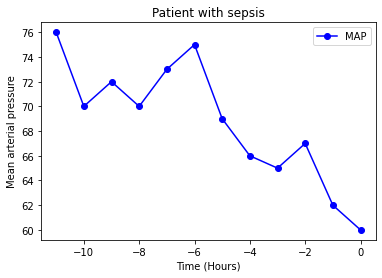

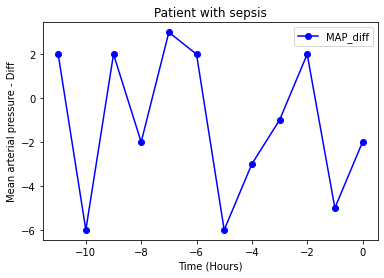

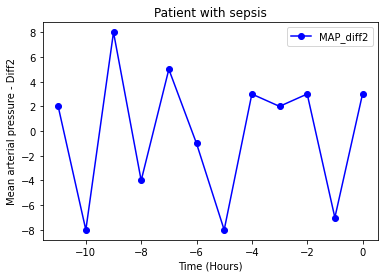

In [52]:
#21885086 - flag=1
#51CCD6CA - Flag=0
#patient_1 = Full_DF[Full_DF["h-num_demo"]=="21885086"][grapgh_list]
#patient_0 = Full_DF[Full_DF["h-num_demo"]=="51CCD6CA"][grapgh_list]
#patient_1
#patient_0

#With Sepsis - MAP
df_graph_MAP_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "09D487B0")]
df_graph_MAP_sepsis = df_graph_MAP_sepsis[grapgh_list]
df_graph_MAP_sepsis.plot(x ='T0', y='MAP',linestyle='-', marker='o', color='b')
plt.title("Patient with sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure")

#With Sepsis - DIff
df_graph_MAP_diff_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "09D487B0")]
df_graph_MAP_diff_sepsis = df_graph_MAP_diff_sepsis[grapgh_list1]
df_graph_MAP_diff_sepsis.plot(x ='T0', y='MAP_diff',linestyle='-', marker='o', color='b')
plt.title("Patient with sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure - Diff")

#With Sepsis - DIff2
df_graph_MAP_diff2_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "09D487B0")]
df_graph_MAP_diff2_sepsis = df_graph_MAP_diff2_sepsis[grapgh_list2]
df_graph_MAP_diff2_sepsis.plot(x ='T0', y='MAP_diff2',linestyle='-', marker='o', color='b')
plt.title("Patient with sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure - Diff2")

Text(0, 0.5, 'Mean arterial pressure - Diff2')

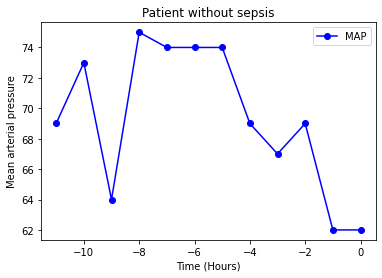

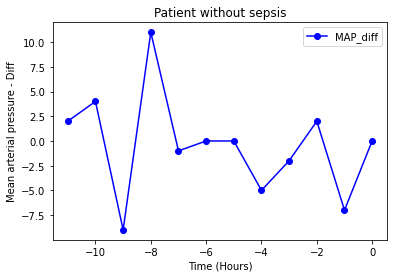

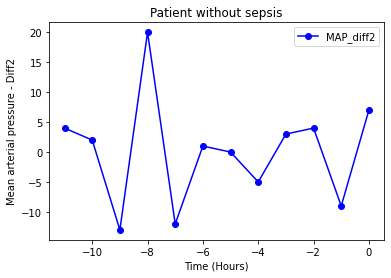

In [53]:
#Non Sepsis - MAP
df_graph_MAP_non_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "51CCD6CA")]
df_graph_MAP_non_sepsis = df_graph_MAP_non_sepsis[grapgh_list]
df_graph_MAP_non_sepsis.plot(x ='T0', y='MAP',linestyle='-', marker='o', color='b')
plt.title("Patient without sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure")

#Non Sepsis - DIff
df_graph_MAP_diff_non_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "51CCD6CA")]
df_graph_MAP_diff_non_sepsis = df_graph_MAP_diff_non_sepsis[grapgh_list1]
df_graph_MAP_diff_non_sepsis.plot(x ='T0', y='MAP_diff',linestyle='-', marker='o', color='b')
plt.title("Patient without sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure - Diff")

#Non Sepsis - DIff2
df_graph_MAP_diff2_non_sepsis = Full_DF_diff[(Full_DF_diff['T0'] <= 0) & (Full_DF_diff['T0'] > -12) & (Full_DF_diff['h-num_demo'] == "51CCD6CA")]
df_graph_MAP_diff2_non_sepsis = df_graph_MAP_diff2_non_sepsis[grapgh_list2]
df_graph_MAP_diff2_non_sepsis.plot(x ='T0', y='MAP_diff2',linestyle='-', marker='o', color='b')
plt.title("Patient without sepsis")
plt.xlabel("Time (Hours)")
plt.ylabel("Mean arterial pressure - Diff2")

In [54]:
#NWith Sepsis
df_graph_MAP_sepsis = Full_DF[(Full_DF['T0'] <= 0) & (Full_DF['T0'] > -12) & (Full_DF['Sepsis Flag'] == 1)]
df_graph_MAP_sepsis = df_graph_MAP_sepsis[grapgh_list]
df_graph_MAP_sepsis = df_graph_MAP_sepsis.dropna()

In [55]:
#No Sepsis
df_graph_MAP_no_sepsis = Full_DF[(Full_DF['T0'] <= 0) & (Full_DF['T0'] > -12) & (Full_DF['Sepsis Flag'] == 0)]
df_graph_MAP_no_sepsis = df_graph_MAP_no_sepsis[grapgh_list]
df_graph_MAP_no_sepsis = df_graph_MAP_no_sepsis.dropna()
df_graph_MAP_no_sepsis

,MAP,T0
29423,128.00000,-11
29424,128.00000,-10
29425,128.00000,-9
29426,128.00000,-8
29427,128.00000,-7
...,...,...
29576,69.00002,-4
29577,66.99998,-3
29578,69.00002,-2
29579,61.99999,-1


In [56]:
#print(result_temp['MAP__matrix_profile__feature_"mean"__threshold_0.98'].mean())